In [1]:
%matplotlib inline
import numpy as np
import seaborn
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Load the data from Excel, remove data points that are not comparable.
kin_df = pd.read_excel('01152018rubisco_kinetics.xlsx', index_col=0)
kin_df = kin_df[kin_df.mutant == False]

# Some measurements are made at 85 C and are not comparable.
high_T = kin_df.Temp_C > 30
kin_df = kin_df.loc[np.logical_not(high_T)]

# Want to split data in various ways
# Savir vs. Non-Savir (mostly new) data
savir_df = kin_df[kin_df.savir]
nonsavir_df = kin_df[kin_df.savir == False]

# Group by RuBisCO form
grouped_form = kin_df.groupby('form_text')
# Group by manually curated "interesting" category mostly for famous RuBisCO isoforms
grouped_interesting = kin_df.groupby('interesting')

# Markers we use for plotting below.
markers = 'o><^dsphH*'

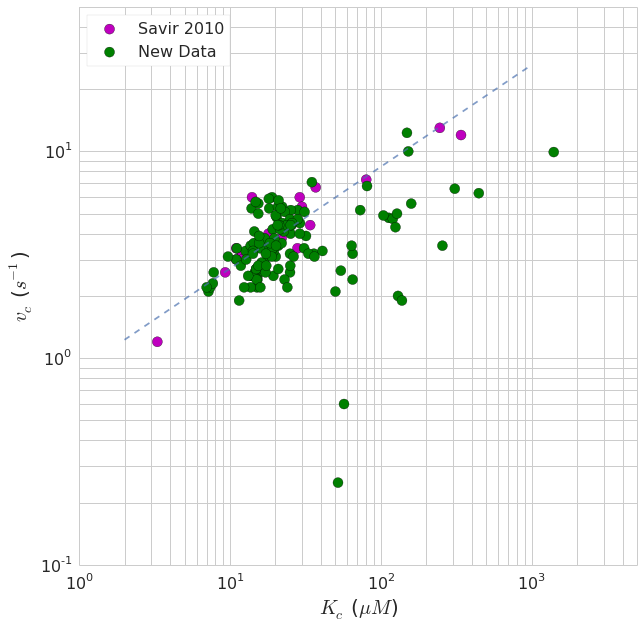

In [3]:
# Plot 1: Data from Savir separate from new data.
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')

# loglog scale
plt.xscale('log')
plt.yscale('log')

# Note - axes are reversed from the Savir paper so above the line = good.
plt.scatter(savir_df.Kc, savir_df.Vc, c='m', s=100, label='Savir 2010')
plt.scatter(nonsavir_df.Kc, nonsavir_df.Vc, c='g', s=100, label='New Data')

# Plot Savir's power law for Kc vs. Vc
# Savir 2010 says Kc = 1.32 * Vc^2.03
# Therefore Vc = (Kc/1.32)^(1/2.03)
xs = np.arange(2, 1000, 5)
projected_Vcs = np.power(xs/1.32, 1.0/2.03)
plt.plot(xs, projected_Vcs, ls='--', alpha=0.7)

plt.legend(loc=2, fontsize=16, frameon=True)
plt.xlabel('$K_c$ ($\mu M$)', fontsize=20)
plt.ylabel('$v_c$ ($s^{-1}$)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(1e-1, 50)
plt.xlim(1, 5e3)

plt.show()

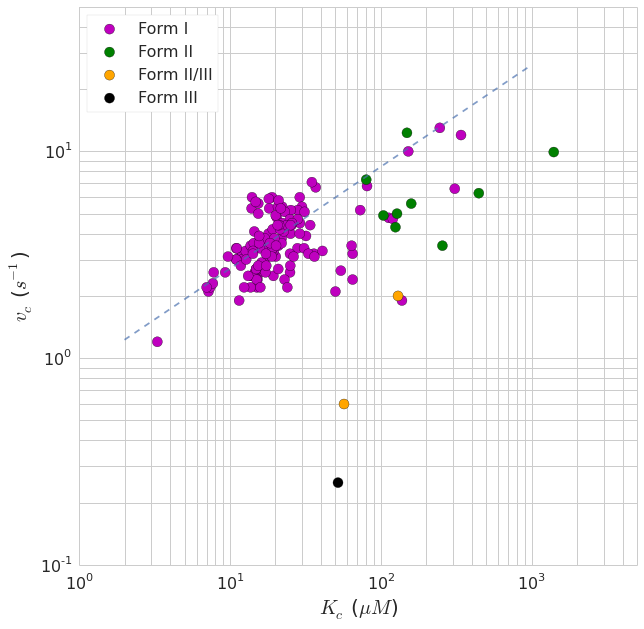

In [4]:
# Plot Kc vs. Vc coloring by RuBisCO form.
# Note that a lot of the spread in the Form II measurements is due to the spread of Rubrum data in the dataset.
# We included these data points on purpose, but they make the correlations look weaker of course.
# Need to dig through the data and see which numbers were measured in a trustworthy fashion.
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')

plt.xscale('log')
plt.yscale('log')

colors = ['m', 'g', 'orange', 'k']
for i, (group, gdf) in enumerate(grouped_form):
    label = 'Form %s' % group
    c = colors[i]
    plt.scatter(gdf.Kc, gdf.Vc, c=c, s=100, label=label)

# Savir 2010 says Kc = 1.32 * Vc^2.03
# Therefore Vc = (Kc/1.32)^(1/2.03)
xs = np.arange(2, 1000, 5)
projected_Vcs = np.power(xs/1.32, 1.0/2.03)
plt.plot(xs, projected_Vcs, ls='--', alpha=0.7)

plt.legend(loc=2, fontsize=16, frameon=True)
plt.xlabel('$K_c$ ($\mu M$)', fontsize=20)
plt.ylabel('$v_c$ ($s^{-1}$)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(1e-1, 50)
plt.xlim(1, 5e3)

plt.show()

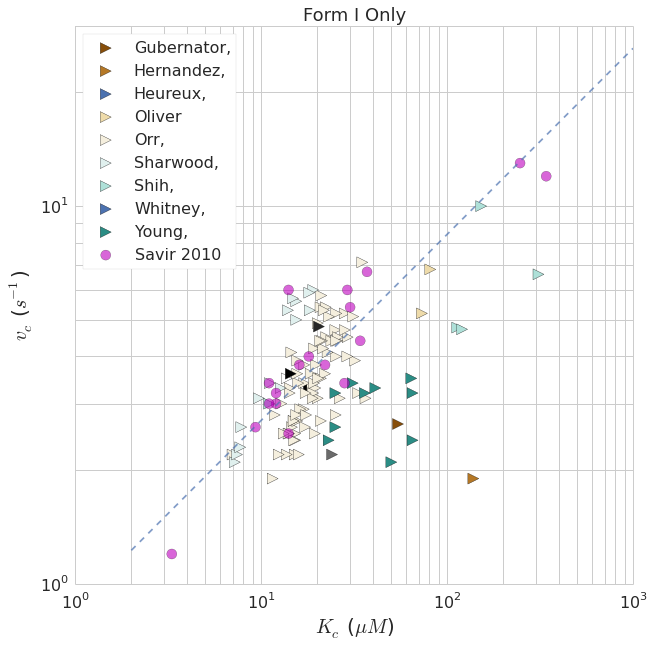

In [5]:
# Plot Kc vs. Vc for FI RuBisCOs alone, coloring by reference.
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')

plt.xscale('log')
plt.yscale('log')

colors = seaborn.color_palette("BrBG", 10)
fIs = grouped_form.get_group('I')
fIs_nonsavir = fIs[fIs.savir == False]
grouped_ref = fIs_nonsavir.groupby('Citation')
for i, (group, gdf) in enumerate(grouped_ref):
    l = group.split()[0]
    c = colors[i]
    plt.scatter(gdf.Kc, gdf.Vc, c=c, s=120, marker='>', label=l)

savir_FIs = fIs[fIs.savir == True]
plt.scatter(savir_FIs.Kc, savir_FIs.Vc, c='m', s=100, alpha=0.6, label='Savir 2010')

# Savir 2010 says Kc = 1.32 * Vc^2.03
# Therefore Vc = (Kc/1.32)^(1/2.03)
xs = np.arange(2, 1000, 5)
projected_Vcs = np.power(xs/1.32, 1.0/2.03)
plt.plot(xs, projected_Vcs, ls='--', alpha=0.7)

plt.legend(loc=2, fontsize=16, frameon=True)
plt.title('Form I Only', fontsize=18)
plt.xlabel('$K_c$ ($\mu M$)', fontsize=20)
plt.ylabel('$v_c$ ($s^{-1}$)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(1e0, 30)
plt.xlim(1, 1e3)

plt.show()

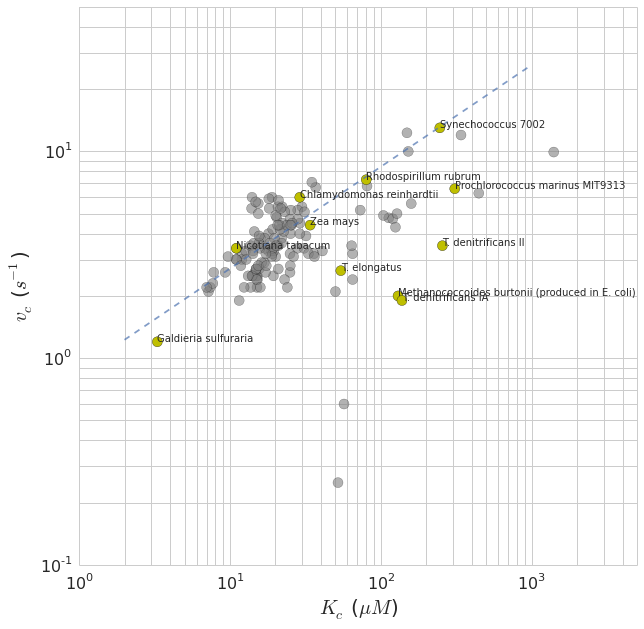

In [6]:
# Annotate "interesting" RuBisCOs, demarcated in the spreadsheet.
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')

plt.xscale('log')
plt.yscale('log')

interesting = grouped_interesting.get_group(True)
others = grouped_interesting.get_group(False)

plt.scatter(others.Kc, others.Vc, c='grey', s=100, alpha=0.6)
plt.scatter(interesting.Kc, interesting.Vc, c='y', s=100)

# Comment out this loop for text-free diagram.
for i in interesting.index:
    r = interesting.loc[i]
    plt.text(r.Kc, r.Vc, i)

# Savir 2010 says Kc = 1.32 * Vc^2.03
# Therefore Vc = (Kc/1.32)^(1/2.03)
xs = np.arange(2, 1000, 5)
projected_Vcs = np.power(xs/1.32, 1.0/2.03)
plt.plot(xs, projected_Vcs, ls='--', alpha=0.7)

plt.xlabel('$K_c$ ($\mu M$)', fontsize=20)
plt.ylabel('$v_c$ ($s^{-1}$)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(1e-1, 50)
plt.xlim(1, 5e3)

plt.show()

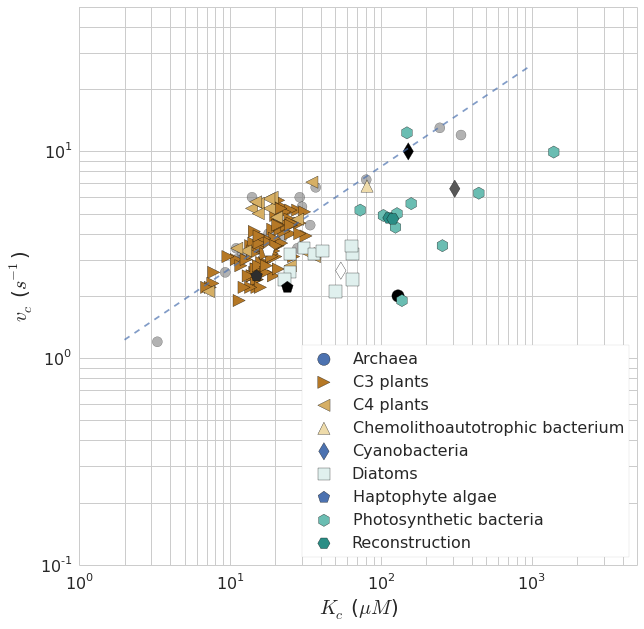

In [7]:
# Kc vs. Vc - show new data by taxonomic grouping of the organism. 
# Notice again the wide spread in photosynthetic bacteria being due to the
# very large deviations in measurements for the Rubrum FII enzyme.
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')
colors = seaborn.color_palette("BrBG", 10)

plt.xscale('log')
plt.yscale('log')

grouped = nonsavir_df.groupby('Taxonomy')

plt.scatter(savir_df.Kc, savir_df.Vc, c='grey', s=100, alpha=0.6)

for i, (group, gdf) in enumerate(grouped):
    marker = markers[i % len(markers)]
    c = colors[i % len(colors)]
    plt.scatter(gdf.Kc, gdf.Vc, label=group, s=150, c=c, marker=marker)

# Savir 2010 says Kc = 1.32 * Vc^2.03
# Therefore Vc = (Kc/1.32)^(1/2.03)
xs = np.arange(2, 1000, 5)
projected_Vcs = np.power(xs/1.32, 1.0/2.03)
plt.plot(xs, projected_Vcs, ls='--', alpha=0.7)

plt.legend(loc=4, fontsize=16, frameon=True)
plt.xlabel('$K_c$ ($\mu M$)', fontsize=20)
plt.ylabel('$v_c$ ($s^{-1}$)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(1e-1, 50)
plt.xlim(1, 5e3)

plt.show()

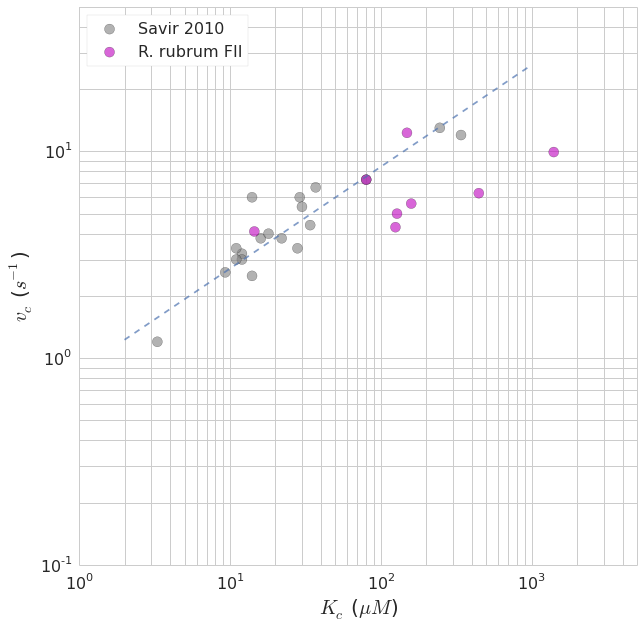

In [8]:
# Highlight the variation in the Rubrum FII measurements on Kc vs. Vc plot.
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')
colors = seaborn.color_palette("BrBG", 10)

plt.xscale('log')
plt.yscale('log')

rubrums = kin_df.index.str.match('.*rubrum.*', case=False)
rubrums = kin_df.loc[rubrums]

plt.scatter(savir_df.Kc, savir_df.Vc, c='grey', s=100, alpha=0.6, label='Savir 2010')
plt.scatter(rubrums.Kc, rubrums.Vc, c='m', s=100, alpha=0.6, label='R. rubrum FII')

# Savir 2010 says Kc = 1.32 * Vc^2.03
# Therefore Vc = (Kc/1.32)^(1/2.03)
xs = np.arange(2, 1000, 5)
projected_Vcs = np.power(xs/1.32, 1.0/2.03)
plt.plot(xs, projected_Vcs, ls='--', alpha=0.7)

plt.legend(loc=2, fontsize=16, frameon=True)
plt.xlabel('$K_c$ ($\mu M$)', fontsize=20)
plt.ylabel('$v_c$ ($s^{-1}$)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(1e-1, 50)
plt.xlim(1, 5e3)

plt.show()

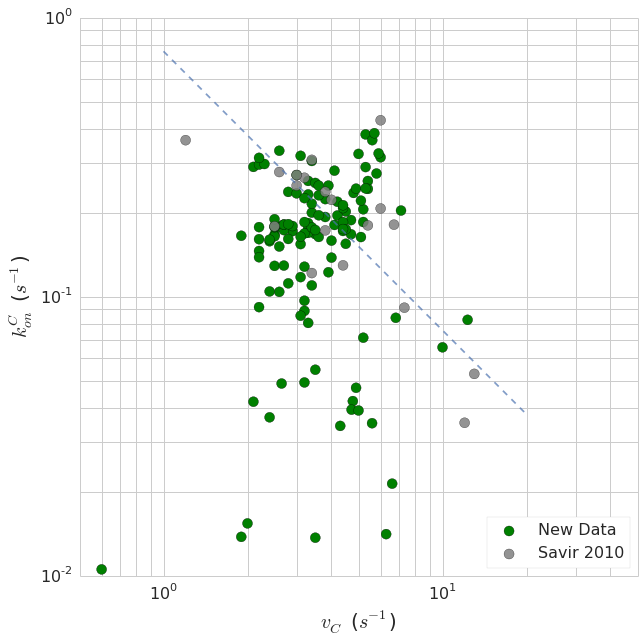

In [9]:
# Mechanistic proposal #1 from Savir - Vc vs. k_onC graph.
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')
colors = seaborn.color_palette("BrBG", 10)

plt.xscale('log')
plt.yscale('log')

plt.scatter(nonsavir_df.Vc, nonsavir_df.kon_C, c='g', s=100, label='New Data')
plt.scatter(savir_df.Vc, savir_df.kon_C, c='grey', s=100, alpha=0.85, label='Savir 2010')

# Savir 2010 says konC = vc/KC = vc/(1.32*vc^2) = 0.757/vc
xs = np.arange(1, 20, 0.1)
projected_konC = 0.757/xs
plt.plot(xs, projected_konC, ls='--', alpha=0.7)

plt.legend(loc=4, fontsize=16, frameon=True)
plt.xlabel('$v_C$ ($s^{-1}$)', fontsize=20)
plt.ylabel('$k_{on}^C$ ($s^{-1}$)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(1e-2, 1)
plt.xlim(0.5, 50)

plt.show()

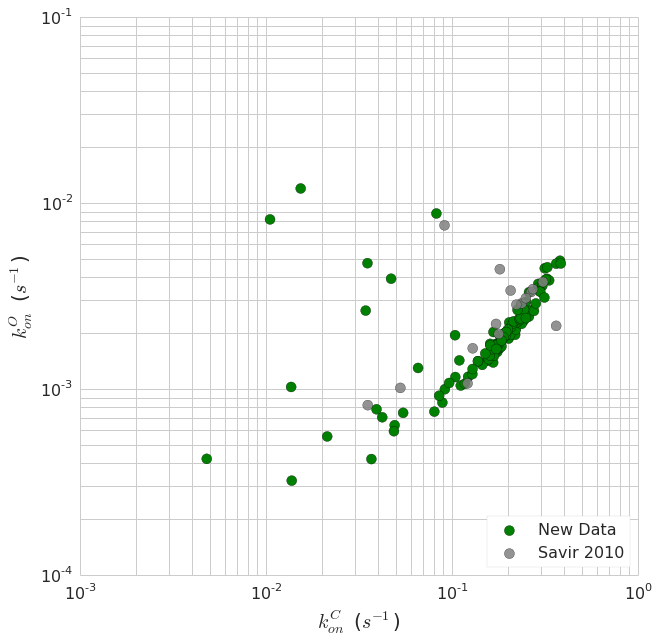

In [10]:
# Mechanistic proposal #2 from Savir - k_onC vs k_onO
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')
colors = seaborn.color_palette("BrBG", 10)

plt.xscale('log')
plt.yscale('log')

plt.scatter(nonsavir_df.kon_C, nonsavir_df.kon_O, c='g', s=100, label='New Data')
plt.scatter(savir_df.kon_C, savir_df.kon_O, c='grey', s=100, alpha=0.85, label='Savir 2010')

# NOTE: can't find the prefactor for this power law in the paper. 
# Can recalculate by doing regression from the Savir data but didn't have time before presentation. 
# Would prefer to calculate from numbers reported in the PNAS paper. Probably possible, will take some thought.

plt.legend(loc=4, fontsize=16, frameon=True)
plt.xlabel('$k_{on}^C$ ($s^{-1}$)', fontsize=20)
plt.ylabel('$k_{on}^O$ ($s^{-1}$)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(1e-4, .1)
plt.xlim(1e-3, 1)

plt.show()

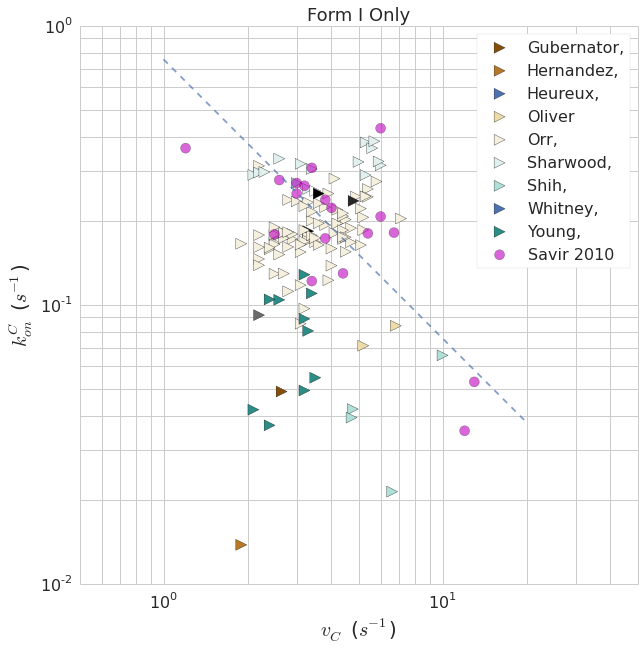

In [11]:
# Mechanistic proposal #1 from Savir - Vc vs. k_onC only for FI enzymes, color by reference
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')

plt.xscale('log')
plt.yscale('log')

colors = seaborn.color_palette("BrBG", 10)
fIs = grouped_form.get_group('I')
fIs_nonsavir = fIs[fIs.savir == False]
grouped_ref = fIs_nonsavir.groupby('Citation')
for i, (group, gdf) in enumerate(grouped_ref):
    l = group.split()[0]
    c = colors[i]
    plt.scatter(gdf.Vc, gdf.kon_C, c=c, s=120, marker='>', label=l)

savir_FIs = fIs[fIs.savir == True]
plt.scatter(savir_FIs.Vc, savir_FIs.kon_C, c='m', s=100, alpha=0.6, label='Savir 2010')

# Savir 2010 says konC = vc/KC = vc/(1.32*vc^2) = 0.757/vc
xs = np.arange(1, 20, 0.1)
projected_konC = 0.757/xs
plt.plot(xs, projected_konC, ls='--', alpha=0.7)

plt.title('Form I Only', fontsize=18)
plt.legend(loc=1, fontsize=16, frameon=True)
plt.xlabel('$v_C$ ($s^{-1}$)', fontsize=20)
plt.ylabel('$k_{on}^C$ ($s^{-1}$)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(1e-2, 1)
plt.xlim(0.5, 50)

plt.show()

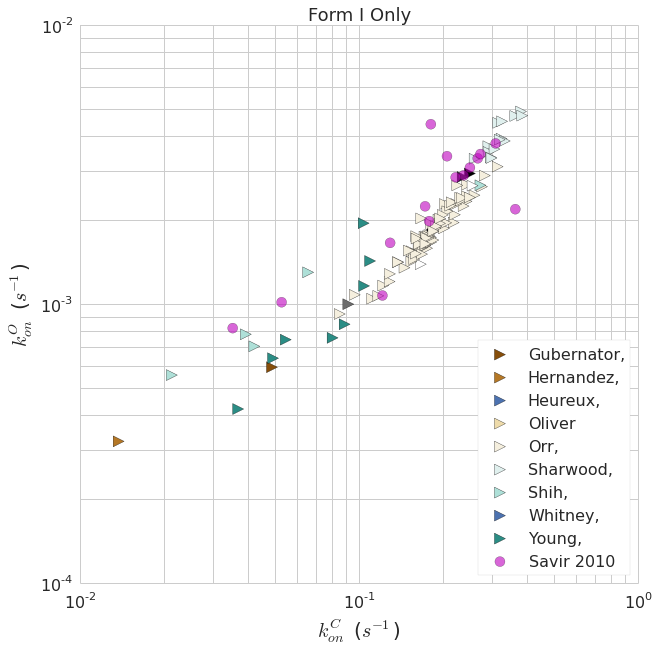

In [12]:
# Mechanistic proposal #2 from Savir - k_onC vs k_onO only for FI enzymes, color by reference
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')

plt.xscale('log')
plt.yscale('log')

colors = seaborn.color_palette("BrBG", 10)
fIs = grouped_form.get_group('I')
fIs_nonsavir = fIs[fIs.savir == False]
grouped_ref = fIs_nonsavir.groupby('Citation')
for i, (group, gdf) in enumerate(grouped_ref):
    l = group.split()[0]
    c = colors[i]
    plt.scatter(gdf.kon_C, gdf.kon_O, c=c, s=120, marker='>', label=l)

savir_FIs = fIs[fIs.savir == True]
plt.scatter(savir_FIs.kon_C, savir_FIs.kon_O, c='m', s=100, alpha=0.6, label='Savir 2010')

plt.title('Form I Only', fontsize=18)
plt.legend(loc=4, fontsize=16, frameon=True)
plt.xlabel('$k_{on}^C$ ($s^{-1}$)', fontsize=20)
plt.ylabel('$k_{on}^O$ ($s^{-1}$)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.ylim(1e-4, 1e-2)
plt.xlim(1e-2, 1)

plt.show()